# Prisoner's Dilemma (Game Theory) Model

(Payoffs)      | S1 Not Confess | S1 Confess
-------------- | -------------- | ----------
S2 Not Confess | -1, -1         | 0, -10
S2 Confess     | -10, 0         | -4, -4

In [1]:
payoff_map = {
    ('NC', 'NC'): (-1, -1),
    ('C', 'NC'): (0, -10),
    ('NC', 'C'): (-10, 0),
    ('C', 'C'): (-4, -4)
}

In [2]:
my_payoff, your_payoff = payoff_map[('NC', 'C')]
print('I got {0}'.format(my_payoff))
print('You got {0}'.format(your_payoff))

I got -10
You got 0


## Game Simulation

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# The probability that any given player will confess
prob_confess = 0.1

class Player(object):
    '''
    Any given player.
    '''
    def __init__(self, payoff_map, prob_confess):
        self.payoff_map = payoff_map
        self.prob_confess = prob_confess
        
    def get_action(self):
        '''
        Randomly draw action given prob_confess.
        '''
        if np.random.random() <= prob_confess:
            return 'C'
        
        else:
            return 'NC'
        
        
class Game(object):
    '''
    A game in which players can participate.
    '''
    
    def __init__(self, player_a, player_b):
        self.player_a = player_a
        self.player_b = player_b
        
    def run(self):
        '''
        Run the game: Draw the actions from the players and calculate outcomes.
        '''
        strategy_a = self.player_a.get_action()
        strategy_b = self.player_b.get_action()
        
        self.payoff_a, self.payoff_b = payoff_map[(strategy_a, strategy_b)]
        self.total_payoff = self.payoff_a + self.payoff_b
        self.avg_payoff = self.total_payoff / 2.0

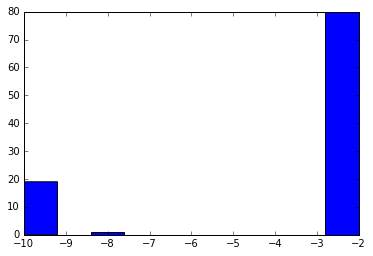

In [20]:
player_a = Player(payoff_map, prob_confess)
player_b = Player(payoff_map, prob_confess)
num_games = 100
game_history = []
total_payoff_history = []

for i in range(num_games):
    g = Game(player_a, player_b)
    g.run()
    game_history.append(g)
    total_payoff_history.append(g.total_payoff)

histogram = plt.hist(total_payoff_history)